In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

voice_data = pd.read_csv('data/voice_gender.csv')

label = "label"

features = voice_data.drop(label, axis=1).columns
X, y = voice_data[features], voice_data[label]

voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


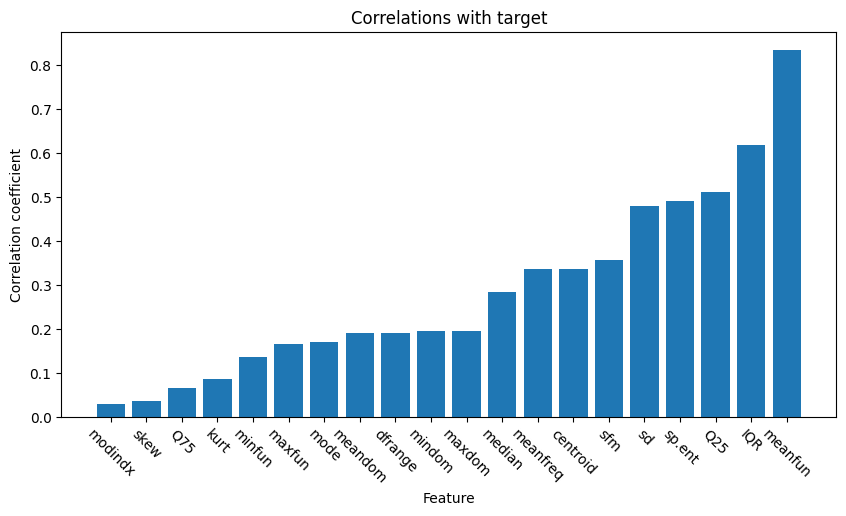

In [68]:
voice_data[label] = voice_data[label].apply(lambda x: 0 if x == "female" else 1)

target = voice_data.corr()[label].abs().sort_values()

target = target.drop(label)
# Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5))  # фигура+координатная плоскость
ax.bar(target.index, target.values)  # столбчатая диаграмма
ax.set_title("Correlations with target")  # название графика
ax.set_xlabel("Feature")  # название оси x
ax.set_ylabel("Сorrelation coefficient")  # название оси y
plt.xticks(rotation=-45)

plt.show()

In [62]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

'Test shape: (634, 20)'

# Задание 1

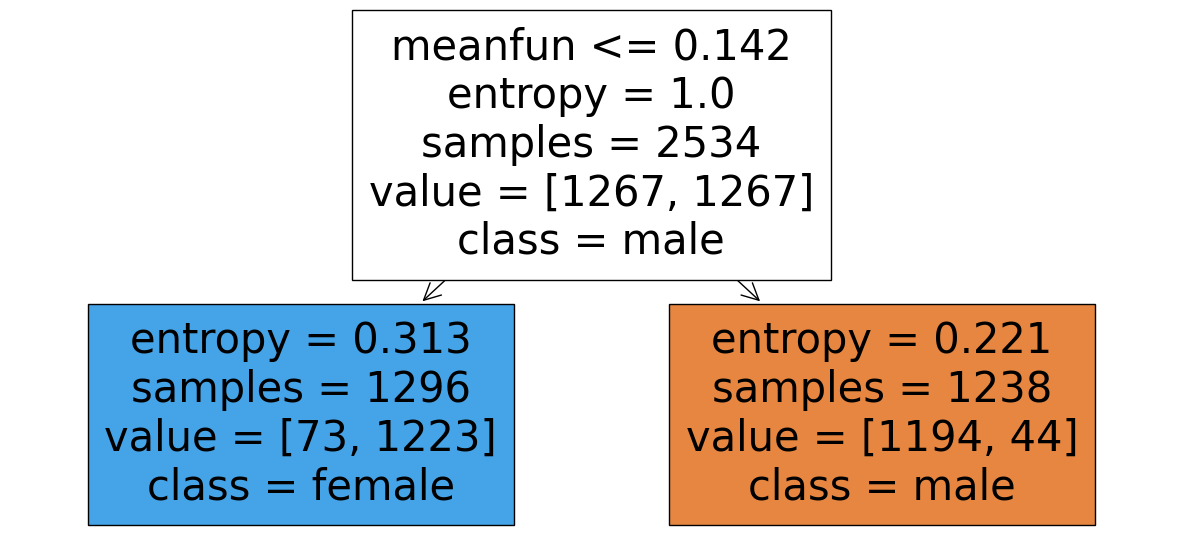

In [31]:
dt = tree.DecisionTreeClassifier(
    criterion="entropy",  # критерий информативности
    random_state=42,  # генератор случайных чисел
    max_depth=1
)
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
decision_tree=dt,
feature_names=X.columns,
class_names=['male', 'female'],
filled=True,
impurity=True
);

1. На основе какого фактора будет построено решающее правило в корневой вершине?
**meanfun (средняя основная частота в акустическом спектре)**

2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх знаков после точки разделителя.
**0.142**

3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине условие, содержится в обучающей выборке? Ответ округлите до одного знака после точки разделителя. Не указывайте в ответе символ %.
**0.5**

4. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точки разделителя.
**0.962**


In [37]:
y_pred = dt.predict(X_test)
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy: 0.962


# Задание 2

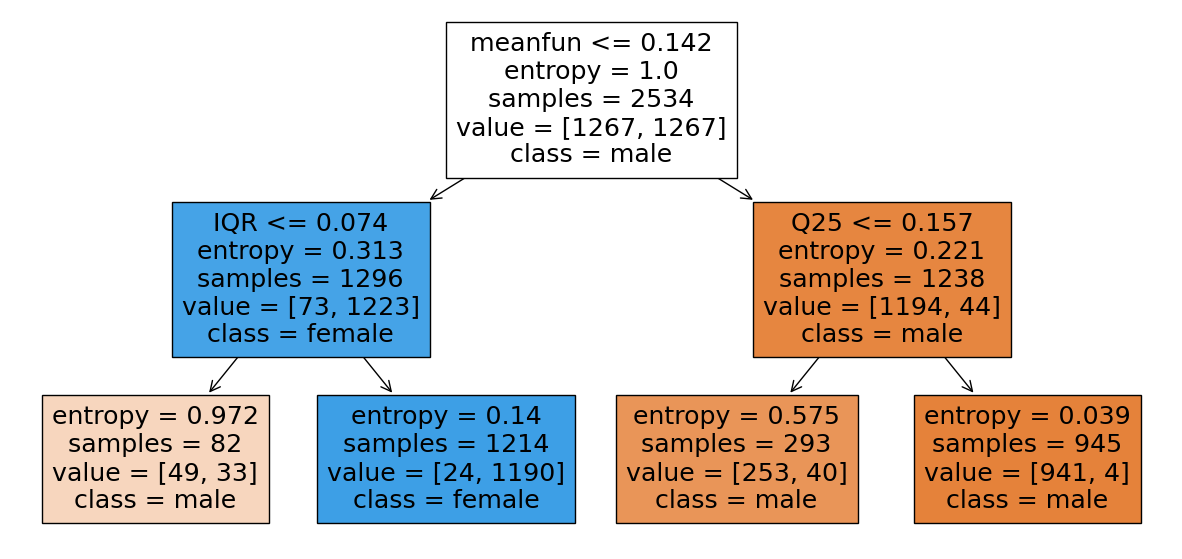

In [33]:
# Задание 2
dt = tree.DecisionTreeClassifier(
    criterion="entropy",  # критерий информативности
    random_state=42,  # генератор случайных чисел
    max_depth=2
)
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
decision_tree=dt,
feature_names=X.columns,
class_names=['male', 'female'],
filled=True,
impurity=True
);

1. Из приведённых ниже факторов выберите те, что используются при построении данного дерева решений:
• C IQR (межквартильный размах частот)
• D meanfun (средняя основная частота в акустическом спектре)
• F Q25 (первый квартиль частоты)
2. Сколько листьев в построенном дереве содержат в качестве предсказания класс female?
Для того, чтобы отобразить имена классов при визуализации дерева решения с помощью функции plot_tree(), укажите параметр class_names=dt.classes_.
• 1
3. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ округлите до трёх знаков после точкиразделителя.
**0.962**

In [38]:
y_pred = dt.predict(X_test)
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy: 0.962


# Задание 3

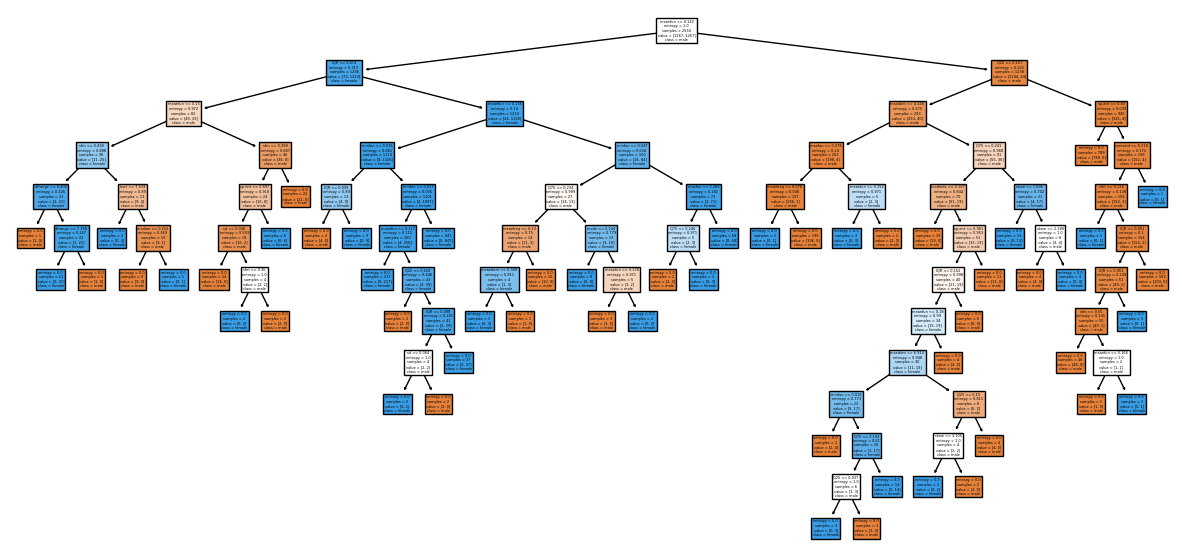

In [39]:
dt = tree.DecisionTreeClassifier(
    criterion="entropy",  # критерий информативности
    random_state=0,  # генератор случайных чисел
)
dt.fit(X_train, y_train)
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
decision_tree=dt,
feature_names=X.columns,
class_names=['male', 'female'],
filled=True,
impurity=True
);

In [41]:
print("depth: {}".format(dt.get_depth()))
print("leaves: {}".format(dt.get_n_leaves()))

depth: 12
depth: 54


1. Чему равна глубина полученного дерева решения? Глубину дерева можно узнать с помощью метода get_depth().
**12**
2. Чему равно количество листьев в полученном дереве решений? Количество листьев можно узнать с помощью метода get_n_leaves().
**54**
3. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики accuracy на каждой из выборок (отдельно на обучающей и тестовой). Ответы округлите до трёх знаков после точки разделителя.
**0.973**

In [42]:
y_pred = dt.predict(X_test)
print("accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy: 0.973


# Задание 4

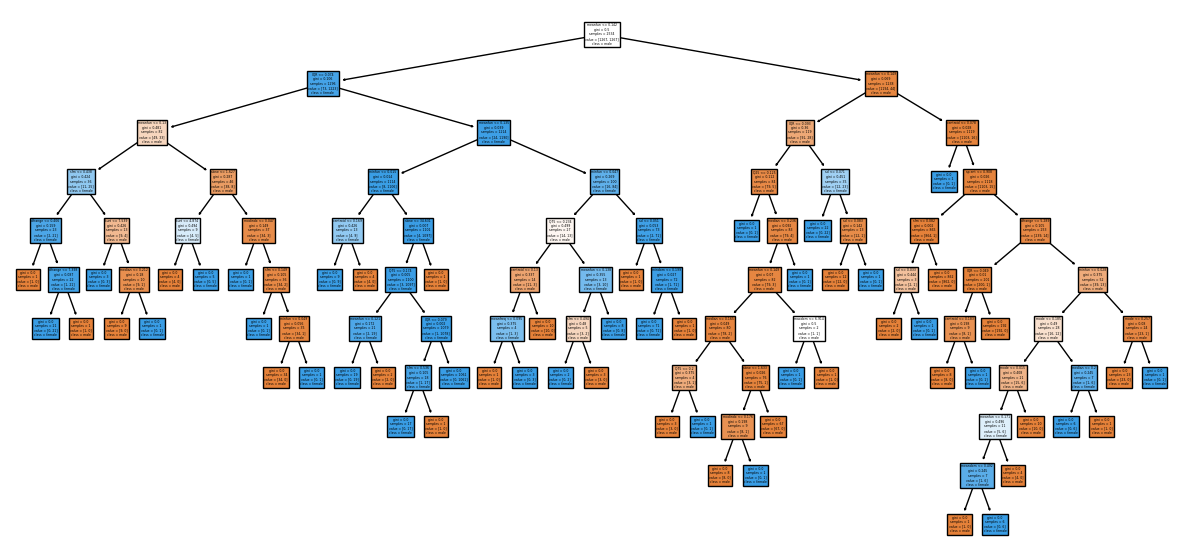

In [56]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "criterion": ["gini", "entropy"],  # критерий информативности
    "max_depth": [4, 5, 6, 7, 8, 9, 10],  # максимальная глубина дерева
    "min_samples_split": [
        3,
        4,
        5,
        10,
    ],  # минимальное количество объектов, необходимое для сплита
}

# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

dt = tree.DecisionTreeClassifier(
    # criterion="entropy",  # критерий информативности
    random_state=0,  # генератор случайных чисел
)
dt.fit(X_train, y_train)

grid_search = GridSearchCV(dt, param_grid=param_grid, cv=cv, scoring="accuracy")

grid_search.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt,
    feature_names=X.columns,
    class_names=["male", "female"],
    filled=True,
    impurity=True,
)

In [64]:
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       317
        male       0.97      0.97      0.97       317

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

0.9700315457413249


1. Какой критерий информативности использует наилучшая модель?
• **Критерий Джини**
2. Чему равна оптимальная найденная автоматически (с помощью GridSearchCV) максимальная глубина?
**7**
3. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения? 
**3**
4. С помощью наилучшей модели сделайте предсказание отдельно для обучающей и тестовой выборок. Рассчитайте значение метрики accuracy на каждой из выборок. Ответы округлите до трёх знаков после точки разделителя.
**0.97**

# Задание 5

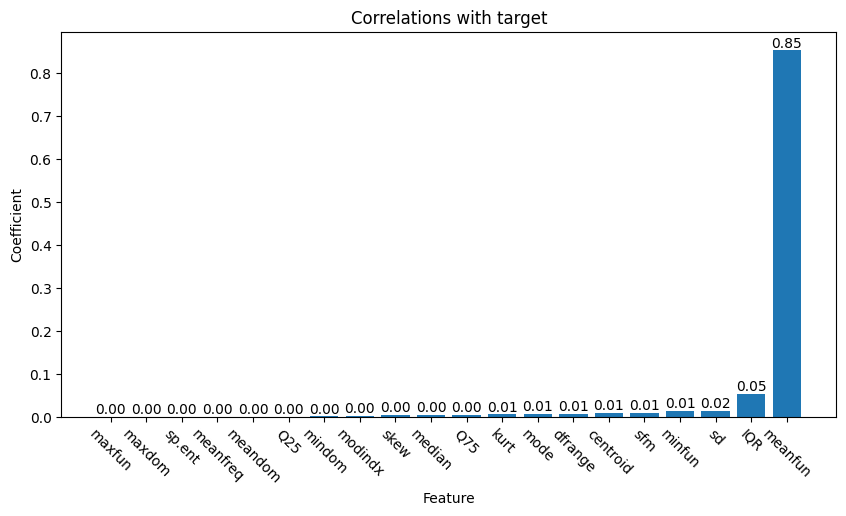

In [84]:
target = dt.feature_importances_

sorted_indices = np.argsort(target)
sorted_target = target[sorted_indices]
sorted_names = X.columns[sorted_indices]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sorted_names, sorted_target)
ax.set_title("Correlations with target")
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient")
plt.xticks(rotation=-45)

for i, importance in enumerate(sorted_target):
    ax.text(i, importance, f"{importance:.2f}", ha="center", va="bottom")

plt.show()

Выделите топ3 наиболее важных факторов, участвующих в построении дерева решений:

• C IQR (межквартильный размах частот)

• D meanfun (средняя основная частота в акустическом спектре)

• E minfun (минимальная основная частота в акустическом спектре)


\+ sd (стандартное отклонение частоты)